In [33]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler

In [34]:
def getDataSetX(item, start, to, size) :
    arr = []
    for i in range(start, to - (size-1)) :
        arr.append(item[i:i+size , 0])
    nparr = np.array(arr)
    nparr = np.reshape(nparr, (nparr.shape[0], nparr.shape[1], 1))
    return (nparr)

In [35]:
def getDataSetY(item, start, to, size) :
    arr = []
    for i in range(start + size, to + 1) :
        arr.append(item[i, 0])
    nparr = np.array(arr)
    return (nparr)

In [36]:
df = pd.read_csv("C:/Users/user8/Desktop/Temp_data.csv")
df = df.iloc[ :100000]
print(df.shape)

(100000, 7)


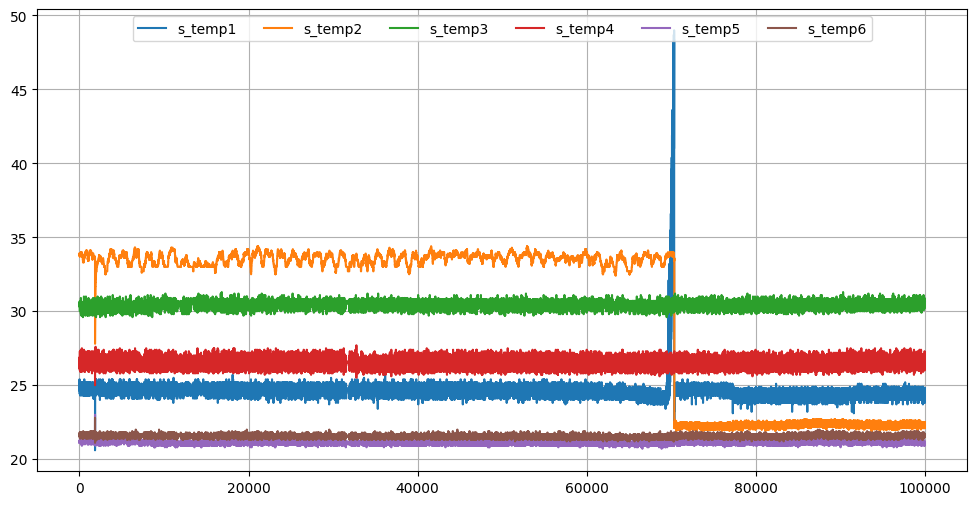

In [37]:
plt.figure(figsize=(12,6))

plt.plot(df['S_TEMP1'], label='s_temp1')
plt.plot(df['S_TEMP2'], label='s_temp2')
plt.plot(df['S_TEMP3'], label='s_temp3')
plt.plot(df['S_TEMP4'], label='s_temp4')
plt.plot(df['S_TEMP5'], label='s_temp5')
plt.plot(df['S_TEMP6'], label='s_temp6')
plt.legend(loc='upper center', ncol=6)
plt.grid()

plt.show()

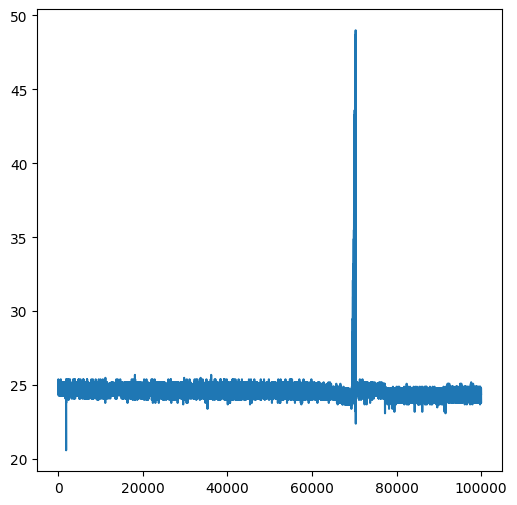

In [38]:
plt.figure(figsize=(6,6))
plt.plot(df['S_TEMP1'])
plt.show()

In [39]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0, len(df)), columns=['S_TIME', 'S_TEMP1'])

for i in range(0, len(data)) :
    
    new_data['S_TIME'][i] = data['S_TIME'][i]
    new_data['S_TEMP1'][i] = data['S_TEMP1'][i]
    
new_data.index = new_data.S_TIME
new_data.drop('S_TIME', axis=1, inplace=True)

final_data = new_data.values

train_idx = int(final_data.shape[0] * 0.8)

print(train_idx)
print(final_data.shape[0] - train_idx)

80000
20000


In [40]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(final_data) 

In [41]:
x_train = getDataSetX(scaled_data, 0, train_idx-1, 10)
y_train = getDataSetY(scaled_data, 0, train_idx-1, 10)
x_test = getDataSetX(scaled_data, train_idx, final_data.shape[0]-1, 10)
y_test = getDataSetY(scaled_data, train_idx, final_data.shape[0]-1, 10)

In [42]:
lstm_model = Sequential([
    LSTM(units=10, return_sequences=True, input_shape=(x_train.shape[1],1)),
    LSTM(units=10),
    Dense(1)
])
lstm_model.compile(loss='mse', optimizer='adam')
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10, 10)            480       
_________________________________________________________________
lstm_5 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [43]:
history_lstm = lstm_model.fit(x_train, y_train, epochs=10, batch_size=32,
                             validation_split=0.2)

Epoch 1/10
2000/2000 [==============================] - 9s 4ms/step - loss: 1.0390e-04 - val_loss: 0.0040
Epoch 2/10
2000/2000 [==============================] - 8s 4ms/step - loss: 5.5608e-05 - val_loss: 0.0035
Epoch 3/10
2000/2000 [==============================] - 8s 4ms/step - loss: 5.4351e-05 - val_loss: 0.0030
Epoch 4/10
2000/2000 [==============================] - 8s 4ms/step - loss: 5.2849e-05 - val_loss: 0.0025
Epoch 5/10
2000/2000 [==============================] - 8s 4ms/step - loss: 5.1384e-05 - val_loss: 0.0023
Epoch 6/10
2000/2000 [==============================] - 8s 4ms/step - loss: 5.1126e-05 - val_loss: 0.0022
Epoch 7/10
2000/2000 [==============================] - 8s 4ms/step - loss: 5.0849e-05 - val_loss: 0.0022
Epoch 8/10
2000/2000 [==============================] - 8s 4ms/step - loss: 5.0791e-05 - val_loss: 0.0022
Epoch 9/10
2000/2000 [==============================] - 8s 4ms/step - loss: 5.0550e-05 - val_loss: 0.0022
Epoch 10/10
2000/2000 [=======================

In [44]:
lstm_model.save('C:/Users/user8/Desktop/lstm_temp1.h5')

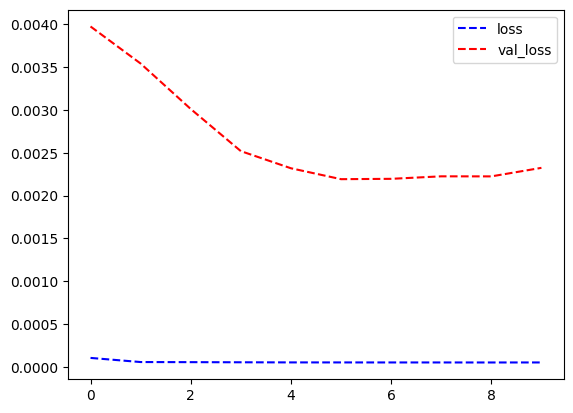

In [45]:
plt.plot(history_lstm.history['loss'], 'b--', label='loss')
plt.plot(history_lstm.history['val_loss'], 'r--', label='val_loss')
plt.legend()
plt.show()

In [46]:
pred_s_temp1 = lstm_model.predict(x_test)
pred_s_temp1 = scaler.inverse_transform(pred_s_temp1)

In [47]:
test_data = final_data[train_idx: , : ]
print(test_data[10:, 0])
print(pred_s_temp1[ : , 0])

# MAPE(Mean Absolute Percentage Error)
print(np.mean(np.abs((test_data[10:, 0] - pred_s_temp1[ : , 0]) / test_data[10:, 0]))*100)

[23.8 24.3 24.4 ... 24.4 24.6 24.4]
[24.498926 24.413443 24.446642 ... 24.558247 24.559057 24.59296 ]
0.9733275558059581


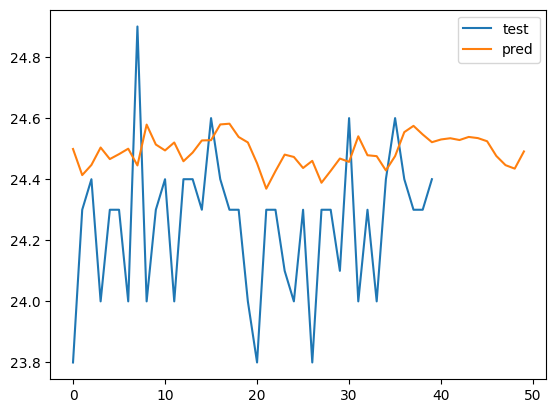

In [48]:
plt.plot(test_data[10:50, 0], label='test')
plt.plot(pred_s_temp1[:50], label='pred')
plt.legend()
plt.show()